In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', names=['Label', 'Message'])

In [3]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

# 1. Data Cleaning

In [5]:
# Check Missing Values

df.isna().sum()

Label      0
Message    0
dtype: int64

In [6]:
# Check datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['Label'] = label_enc.fit_transform(df['Label'])

In [8]:
df.sample(5)

,Label,Message
5290,0,Dear where you. Call me
3105,0,That's y i said it's bad dat all e gals know u...
3952,0,Hi dude hw r u da realy mising u today
1723,0,Thought praps you meant another one. Goodo! I'...
287,0,Ok..


In [9]:
# Check duplicated values

df.duplicated().sum()

403

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

# 2. EDA

In [12]:
df['Label'].value_counts()

0    4516
1     653
Name: Label, dtype: int64

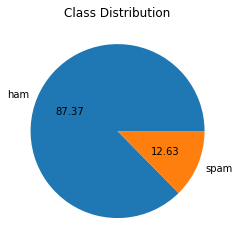

In [13]:
import matplotlib.pyplot as plt

plt.pie(df['Label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.title("Class Distribution")
plt.show();

#### We have imbalanced data

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Himz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters'] = df['Message'].apply(len)

In [17]:
df.head()

,Label,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# Number of words

df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df.head()

,Label,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
# Number of Sentences

df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,Label,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.591023,1.954924
std,58.437457,13.402840,1.366937
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
# Info of Ham Messages

df[df['Label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.264836,1.806244
std,56.715046,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
# Info of Spam Messages

df[df['Label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.983155
std,29.821348,6.993008,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


> We can see spam messages has much higher MEAN of number of characters, words, sentences than non spam messages

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

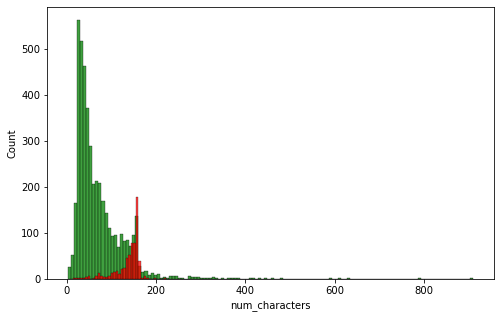

In [25]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df[df['Label']==0]['num_characters'], color='green')
sns.histplot(df[df['Label']==1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

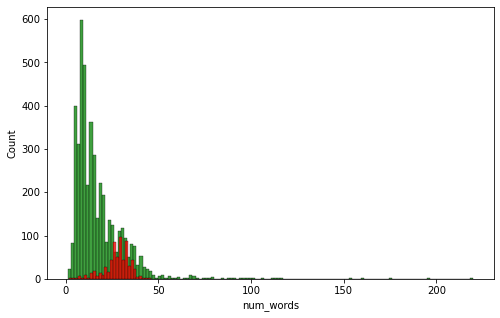

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Label']==0]['num_words'], color='green')
sns.histplot(df[df['Label']==1]['num_words'], color='red')

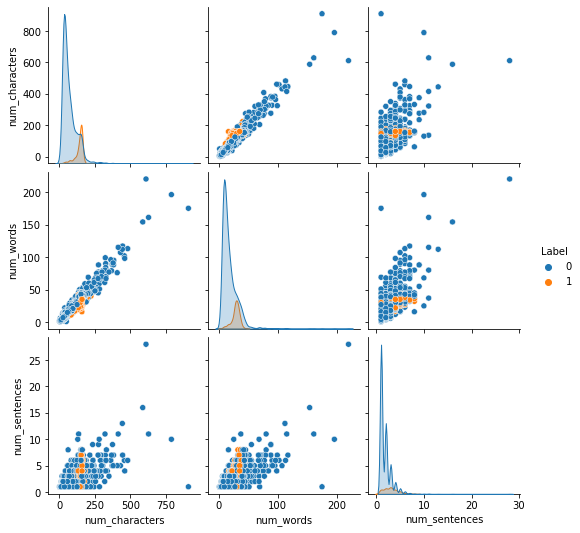

In [27]:

sns.pairplot(df, hue='Label')

<AxesSubplot:>

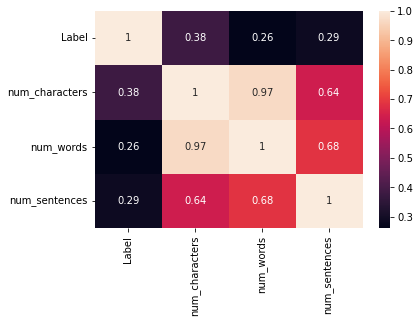

In [28]:
sns.heatmap(df.corr(), annot=True)

> Since all of them has high correlation so we will pick one of them. num_characters is preferable as it has higher corr with Label.

# 3. PreProcessing

-  Lower Case
-  Tokenization
-  Removing special characters
-  Removing Stopwords & Punctuation
-  Stemming

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

In [30]:
import re

def transform_text(text):
    text = text.lower()                   # Lower Case
    text = nltk.word_tokenize(text)       # Tokenize
    y = []
    for i in text:                        # Removing Special characters
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                        # Removing stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                        # Stemming
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [31]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [32]:
df.head()

,Label,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
# Creating wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=2000, height=2000, min_font_size=20, background_color='white')

In [34]:
spam_wc = wc.generate(df[df['Label']==1]['transformed_text'].str.cat(sep=" "))

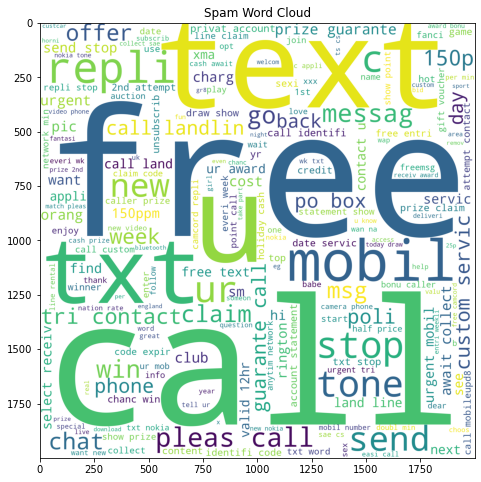

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)
plt.title("Spam Word Cloud")
plt.show();

In [36]:
ham_wc = wc.generate(df[df['Label']==0]['transformed_text'].str.cat(sep=" "))

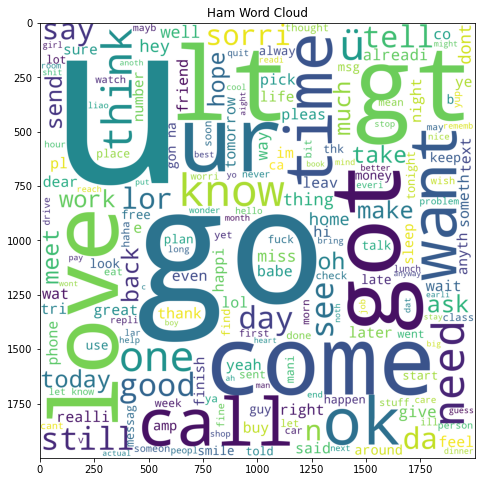

In [37]:
plt.figure(figsize=(8,8))
plt.imshow(ham_wc)
plt.title("Ham Word Cloud")
plt.show();

In [38]:
df.head()

,Label,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


C:\Users\Himz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


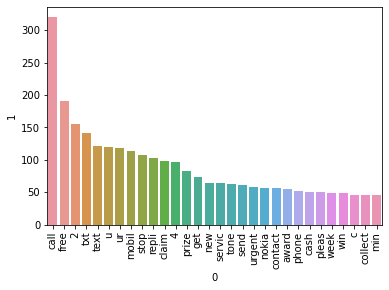

In [39]:
# Checking top 30 words of Spam:

from collections import Counter

spam_corpus = []

for message in df[df['Label']==1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)
        
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show();

C:\Users\Himz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


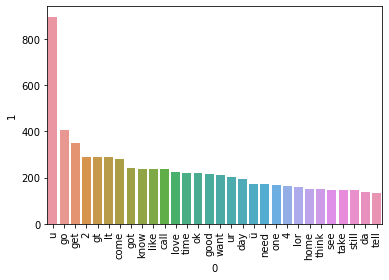

In [40]:
# Checking top 30 words of Ham:

from collections import Counter

ham_corpus = []

for message in df[df['Label']==0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)
        
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show();

# 4. Model Building

- Naive Bayes is considered to work best in text classifications so we will first focus on NB.
    - Here we can use 2 approaches, either Bag-Of-Words or TF IDF.
- Except NB we will train ALL other models to see if we can get better accuracy.

> ### Using CountVectorizer

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer()

In [42]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [43]:
X.shape

(5169, 6782)

In [44]:
y = df['Label'].values

In [45]:
y[:5]

array([0, 0, 1, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y,random_state=42, test_size=0.2)

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [48]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("="*10 + "  Gaussian Naive Bayes   " + "="*10)
print("Accuracy: ",accuracy_score(y_test, y_pred1))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred1))
print("Precision Score: ",precision_score(y_test, y_pred1))

==========  Gaussian Naive Bayes   ==========
Accuracy:  0.8752417794970987
Confusion Matrix: 
 [[781 113]
 [ 16 124]]
Precision Score:  0.5232067510548524


In [49]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("="*10 + "  Multinomial Naive Bayes   " + "="*10)
print("Accuracy: ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred2))
print("Precision Score: ",precision_score(y_test, y_pred2))

==========  Multinomial Naive Bayes   ==========
Accuracy:  0.9729206963249516
Confusion Matrix: 
 [[874  20]
 [  8 132]]
Precision Score:  0.868421052631579


In [50]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("="*10 + "  Binomia Naive Bayes   " + "="*10)
print("Accuracy: ",accuracy_score(y_test, y_pred3))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred3))
print("Precision Score: ",precision_score(y_test, y_pred3))

==========  Binomia Naive Bayes   ==========
Accuracy:  0.9787234042553191
Confusion Matrix: 
 [[891   3]
 [ 19 121]]
Precision Score:  0.9758064516129032


> ### Using TF IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

In [52]:
X = tf.fit_transform(df['transformed_text']).toarray()

In [53]:
X.shape

(5169, 6782)

In [54]:
y = df['Label'].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [56]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("="*10 + "  Gaussian Naive Bayes with TF IDF  " + "="*10)
print("Accuracy: ",accuracy_score(y_test, y_pred1))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred1))
print("Precision Score: ",precision_score(y_test, y_pred1))

==========  Gaussian Naive Bayes with TF IDF  ==========
Accuracy:  0.8704061895551257
Confusion Matrix: 
 [[781 113]
 [ 21 119]]
Precision Score:  0.5129310344827587


In [58]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("="*10 + "  Multinomial Naive Bayes with TF IDF  " + "="*10)
print("Accuracy: ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred2))
print("Precision Score: ",precision_score(y_test, y_pred2))

==========  Multinomial Naive Bayes with TF IDF  ==========
Accuracy:  0.9671179883945842
Confusion Matrix: 
 [[894   0]
 [ 34 106]]
Precision Score:  1.0


In [59]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("="*10 + "  Binomia Naive Bayes with TF IDF  " + "="*10)
print("Accuracy: ",accuracy_score(y_test, y_pred3))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred3))
print("Precision Score: ",precision_score(y_test, y_pred3))

==========  Binomia Naive Bayes with TF IDF  ==========
Accuracy:  0.9787234042553191
Confusion Matrix: 
 [[891   3]
 [ 19 121]]
Precision Score:  0.9758064516129032


> #### Multinomial NB with TF IDF gave us hightest Precision Score (which matters a lot in our imbalanced data) and also 0 False-Positive 

#### TF IDF vectorizer + MNB

# `

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [61]:
lgr = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=2, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [62]:
clfs = {
    'Logistic Regression' : lgr,
    'Support Vector Classifier' : svc,
    'KNeighbour ' :knc,
    'Multinomial NB' : mnb,
    'Decision Tree' : dtc,
    'Random Forest' : rfc,
    'Ada Boost' : abc,
    'Bagging Classifier' : bc,
    'Extra Tree Classifier' : etc,
    'Gradient Boost' : gbc,
    'XGBoost' : xgb
}

In [63]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [64]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    print("="*10 + f"  {name}  " + "="*10)
    acc, prec = train_classifier(clf, X_train, X_test, y_train, y_test)
    
    print("Accuracy:- ", acc)
    print("Precision:- ", prec)
    print()
    accuracy_scores.append(acc)
    precision_scores.append(prec)

==========  Logistic Regression  ==========
Accuracy:-  0.9468085106382979
Precision:-  0.8899082568807339

==========  Support Vector Classifier  ==========
Accuracy:-  0.9700193423597679
Precision:-  0.9504132231404959

==========  KNeighbour   ==========
Accuracy:-  0.9003868471953579
Precision:-  1.0

==========  Multinomial NB  ==========
Accuracy:-  0.9671179883945842
Precision:-  1.0

==========  Decision Tree  ==========
Accuracy:-  0.9439071566731141
Precision:-  0.8660714285714286

==========  Random Forest  ==========
Accuracy:-  0.9738878143133463
Precision:-  1.0

==========  Ada Boost  ==========
Accuracy:-  0.960348162475822
Precision:-  0.9230769230769231

==========  Bagging Classifier  ==========
Accuracy:-  0.965183752417795
Precision:-  0.9

==========  Extra Tree Classifier  ==========
Accuracy:-  0.9545454545454546
Precision:-  0.9696969696969697

==========  Gradient Boost  ==========
Accuracy:-  0.9535783365570599
Precision:-  0.9693877551020408

==========  XGB

In [65]:
performance_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [66]:
performance_df

,Algorithms,Accuracy,Precision
2,KNeighbour,0.900387,1.000000
3,Multinomial NB,0.967118,1.000000
5,Random Forest,0.973888,1.000000
10,XGBoost,0.973888,0.974790
8,Extra Tree Classifier,0.954545,0.969697
9,Gradient Boost,0.953578,0.969388
1,Support Vector Classifier,0.970019,0.950413
6,Ada Boost,0.960348,0.923077
7,Bagging Classifier,0.965184,0.900000
0,Logistic Regression,0.946809,0.889908


> #### We can try to further improve accuracy by restriction number of features in TF IDF

### Model Improvement

> #### 1. Experiment -> Decrease Max features of TF IDF

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features=3000)
X = tf.fit_transform(df['transformed_text']).toarray()
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [68]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    print("="*10 + f"  {name}  " + "="*10)
    acc, prec = train_classifier(clf, X_train, X_test, y_train, y_test)
    
    print("Accuracy:- ", acc)
    print("Precision:- ", prec)
    print()
    accuracy_scores.append(acc)
    precision_scores.append(prec)

==========  Logistic Regression  ==========
Accuracy:-  0.9516441005802708
Precision:-  0.9245283018867925

==========  Support Vector Classifier  ==========
Accuracy:-  0.9729206963249516
Precision:-  0.9516129032258065

==========  KNeighbour   ==========
Accuracy:-  0.9100580270793037
Precision:-  1.0

==========  Multinomial NB  ==========
Accuracy:-  0.9738878143133463
Precision:-  1.0

==========  Decision Tree  ==========
Accuracy:-  0.9361702127659575
Precision:-  0.8363636363636363

==========  Random Forest  ==========
Accuracy:-  0.9758220502901354
Precision:-  0.9914529914529915

==========  Ada Boost  ==========
Accuracy:-  0.9642166344294004
Precision:-  0.9478260869565217

==========  Bagging Classifier  ==========
Accuracy:-  0.9632495164410058
Precision:-  0.8863636363636364

==========  Extra Tree Classifier  ==========
Accuracy:-  0.9506769825918762
Precision:-  0.9494949494949495

==========  Gradient Boost  ==========
Accuracy:-  0.9516441005802708
Precision:-  0.9

In [69]:
temp_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy_feat_3000': accuracy_scores, 'Precision_feat_3000': precision_scores})

In [70]:
performance_df.merge(temp_df, on='Algorithms')

,Algorithms,Accuracy,Precision,Accuracy_feat_3000,Precision_feat_3000
0,KNeighbour,0.900387,1.000000,0.910058,1.000000
1,Multinomial NB,0.967118,1.000000,0.973888,1.000000
2,Random Forest,0.973888,1.000000,0.975822,0.991453
3,XGBoost,0.973888,0.974790,0.973888,0.974790
4,Extra Tree Classifier,0.954545,0.969697,0.950677,0.949495
5,Gradient Boost,0.953578,0.969388,0.951644,0.959184
6,Support Vector Classifier,0.970019,0.950413,0.972921,0.951613
7,Ada Boost,0.960348,0.923077,0.964217,0.947826
8,Bagging Classifier,0.965184,0.900000,0.963250,0.886364
9,Logistic Regression,0.946809,0.889908,0.951644,0.924528


> #### 2. Experiment -> Scaling data using MinMax

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features=3000)
X = tf.fit_transform(df['transformed_text']).toarray()
y = df['Label'].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [72]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    print("="*10 + f"  {name}  " + "="*10)
    acc, prec = train_classifier(clf, X_train, X_test, y_train, y_test)
    
    print("Accuracy:- ", acc)
    print("Precision:- ", prec)
    print()
    accuracy_scores.append(acc)
    precision_scores.append(prec)

==========  Logistic Regression  ==========
Accuracy:-  0.971953578336557
Precision:-  0.9743589743589743

==========  Support Vector Classifier  ==========
Accuracy:-  0.9748549323017408
Precision:-  0.9191176470588235

==========  KNeighbour   ==========
Accuracy:-  0.9003868471953579
Precision:-  1.0

==========  Multinomial NB  ==========
Accuracy:-  0.9787234042553191
Precision:-  0.9402985074626866

==========  Decision Tree  ==========
Accuracy:-  0.9361702127659575
Precision:-  0.8363636363636363

==========  Random Forest  ==========
Accuracy:-  0.9758220502901354
Precision:-  0.9914529914529915

==========  Ada Boost  ==========
Accuracy:-  0.9642166344294004
Precision:-  0.9478260869565217

==========  Bagging Classifier  ==========
Accuracy:-  0.9632495164410058
Precision:-  0.8863636363636364

==========  Extra Tree Classifier  ==========
Accuracy:-  0.9506769825918762
Precision:-  0.9494949494949495

==========  Gradient Boost  ==========
Accuracy:-  0.9516441005802708
Pr

In [73]:
temp2_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy_scaled': accuracy_scores, 'Precision_scaled': precision_scores})

In [74]:
new_df = performance_df.merge(temp_df, on='Algorithms')

In [75]:
new_df_scaled = new_df.merge(temp2_df, on='Algorithms')

In [76]:
new_df_scaled

,Algorithms,Accuracy,Precision,Accuracy_feat_3000,Precision_feat_3000,Accuracy_scaled,Precision_scaled
0,KNeighbour,0.900387,1.000000,0.910058,1.000000,0.900387,1.000000
1,Multinomial NB,0.967118,1.000000,0.973888,1.000000,0.978723,0.940299
2,Random Forest,0.973888,1.000000,0.975822,0.991453,0.975822,0.991453
3,XGBoost,0.973888,0.974790,0.973888,0.974790,0.973888,0.974790
4,Extra Tree Classifier,0.954545,0.969697,0.950677,0.949495,0.950677,0.949495
5,Gradient Boost,0.953578,0.969388,0.951644,0.959184,0.951644,0.959184
6,Support Vector Classifier,0.970019,0.950413,0.972921,0.951613,0.974855,0.919118
7,Ada Boost,0.960348,0.923077,0.964217,0.947826,0.964217,0.947826
8,Bagging Classifier,0.965184,0.900000,0.963250,0.886364,0.963250,0.886364
9,Logistic Regression,0.946809,0.889908,0.951644,0.924528,0.971954,0.974359


### Scaling impoved accuracy but impacted precision so we will skip scaling technique

> #### 3. Experiment -> Using Voting Classifier of top performing algos

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier

tf = TfidfVectorizer(max_features=3000)
X = tf.fit_transform(df['transformed_text']).toarray()
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

voting = VotingClassifier(estimators=[('XGBoost', xgb), ('Naive Bayes', mnb), ('Random Forest', rfc)], voting='soft')

In [79]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate...
                                            max_bin=256, max_cat_threshold=64,
                                            max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=50, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=2, ...)),
                             ('Naive Bayes', MultinomialNB()),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [80]:
y_pred = voting.predict(X_test)

In [81]:
print("Accuracy:- ", accuracy_score(y_test, y_pred))
print("Precision:- ", precision_score(y_test, y_pred))

Accuracy:-  0.9777562862669246
Precision:-  1.0


### We can either use MNB directly or Voting Classifier of xgb, mnb & rf  ... since they both have almost same score. MNB would be better because it executes faster